In [1]:
#!pip install pycaret[Full]

In [2]:
#!pip install pyyaml==5.4.1

### This notebook is created to showcase the usage of Pycaret
## 

In [3]:
#Importing Libraries

#for data frame processing
import pandas as pd 
import numpy as np
from sklearn.preprocessing import MinMaxScaler

#for plotting
import matplotlib.pyplot as plt
#import plotly.express as px
import seaborn as sns

# for 3D projection
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

In [4]:
#import data set as dataframe 
df = pd.read_csv("data/coupons.csv")

In [5]:
df.shape

(12684, 26)

In [6]:
# Check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [7]:
'''
Car --> 12684 - 108 = 12576 missing values
Bar --> 12684 - 12577 = 107 missing values
CoffeeHouse --> 12684 - 12467 = 217 missing values
CarryAway --> 12684 - 12533 = 151 missing values
RestaurantLessThan20 --> 12684 - 12554 = 130 missing values
Restaurant20To50 --> 12684 - 12495 = 189 missing values

'''
#1. Missing Values

#The attribute "Car" has a significant number of missing values and can be dropped 

# a) we check the values in "car" col before we drop it
print(df.car.unique())

[nan 'Scooter and motorcycle' 'crossover' 'Mazda5' 'do not drive'
 'Car that is too old to install Onstar :D']


In [8]:
#b)No significant information provided. Now we can drop it

df.drop('car', inplace=True, axis=1)

In [9]:
#Impute missing values using Most Frequent values
#Other missing values in 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50' are not significant numbers. Thus they can be replaced by the attribute with the largest count
for col in df.columns[df.isna().any()]:
    largest_count = df[col].value_counts().idxmax()
    df = df.fillna({col: largest_count})

In [10]:
#checking if "car" col was dropped and insignificant missing values were replaced.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12684 non-null  object
 15  CoffeeHouse           12684 non-null

In [11]:
#2. Non-unique Values 

#Object types - 0 non unique values so nothing to do here
df.select_dtypes('object').nunique()

destination              3
passanger                4
weather                  3
time                     5
coupon                   5
expiration               2
gender                   2
age                      8
maritalStatus            5
education                6
occupation              25
income                   9
Bar                      5
CoffeeHouse              5
CarryAway                5
RestaurantLessThan20     5
Restaurant20To50         5
dtype: int64

In [12]:
#Integer types - toCoupon_GEQ5min contains one value only; this is insignificant to our training.
df.select_dtypes('int64').nunique()

temperature          3
has_children         2
toCoupon_GEQ5min     1
toCoupon_GEQ15min    2
toCoupon_GEQ25min    2
direction_same       2
direction_opp        2
Y                    2
dtype: int64

In [13]:
# We do not need the info in toCoupon_GEQ5min since of the distance is greater than 5 minutes to the copoun location then it should be included in "toCoupon_GEQ15min" col
#drop toCoupon_GEQ5min
df.drop('toCoupon_GEQ5min', inplace=True, axis=1)

In [14]:
#checking if "toCoupon_GEQ5min" was dropped
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12684 non-null  object
 15  CoffeeHouse           12684 non-null

In [15]:
# To check the values in the remaining cols
for n in df.select_dtypes('object').columns:
    print(n, df[n].unique())

destination ['No Urgent Place' 'Home' 'Work']
passanger ['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
weather ['Sunny' 'Rainy' 'Snowy']
time ['2PM' '10AM' '6PM' '7AM' '10PM']
coupon ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
expiration ['1d' '2h']
gender ['Female' 'Male']
age ['21' '46' '26' '31' '41' '50plus' '36' 'below21']
maritalStatus ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
education ['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']
occupation ['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Personal Care & Service'
 'Community & Social Services' 'Office & Administrative Support'
 'Constr

In [16]:
#dropping direction_opp col
df.drop(columns=['direction_opp'], inplace=True)

In [17]:
#check if 'direction_opp' col was dropped
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,$37500 - $49999,never,never,1~3,4~8,1~3,0,0,0,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,$37500 - $49999,never,never,1~3,4~8,1~3,0,0,0,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0,0


### Initialize Experiment

In [18]:
from pycaret.classification import *

#Initialize Experiment
classify_experiment = setup(df, 
                       target = 'Y', 
                       session_id=1,
                       train_size = 0.8, # training over 80% of available data
                       log_experiment=True,
                       transformation = True,#Transformation changes the shape of the distribution such that the transformed data can be represented by normal distribution
                       normalize = True, #rescale the values of numeric columns
                       handle_unknown_categorical = True, 
                       unknown_categorical_method = 'most_frequent',
                       remove_multicollinearity = True, #rop one of the two features that are highly correlated with each other
                       ignore_low_variance = True,#all categorical features with statistically insignificant variances are removed from the dataset.
                       combine_rare_levels = True,# all levels in categorical features below the threshold defined in rare_level_threshold param are combined together as a single level
                       numeric_imputation='median',
                       categorical_imputation='mode',
                       experiment_name='Coupon Classification')

,Description,Value
0,session_id,1
1,Target,Y
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(12684, 23)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,22
8,Ordinal Features,False
9,High Cardinality Features,False


2022/04/13 12:25:25 INFO mlflow.tracking.fluent: Experiment with name 'Coupon Classification' does not exist. Creating a new experiment.


### Compare Baseline Models

In [19]:
best_model = compare_models(exclude=['xgboost'], fold=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7501,0.8188,0.8219,0.7578,0.7885,0.4843,0.4868,0.5340
lightgbm,Light Gradient Boosting Machine,0.7501,0.8197,0.8291,0.7544,0.7899,0.4832,0.4865,0.4240
et,Extra Trees Classifier,0.7482,0.8154,0.8117,0.7604,0.7851,0.4818,0.4835,0.6420
gbc,Gradient Boosting Classifier,0.7210,0.7807,0.8153,0.7261,0.7681,0.4209,0.4255,0.7580
lda,Linear Discriminant Analysis,0.6833,0.7367,0.7653,0.7027,0.7325,0.3459,0.3480,0.1900
ridge,Ridge Classifier,0.6830,0.0000,0.7660,0.7021,0.7325,0.3451,0.3472,0.0460
lr,Logistic Regression,0.6827,0.7363,0.7672,0.7013,0.7327,0.3442,0.3464,2.1380
dt,Decision Tree Classifier,0.6799,0.6743,0.7188,0.7171,0.7180,0.3479,0.3479,0.0920
ada,Ada Boost Classifier,0.6773,0.7328,0.7677,0.6951,0.7295,0.3321,0.3348,0.2580
svm,SVM - Linear Kernel,0.6626,0.0000,0.7776,0.6785,0.7217,0.2964,0.3057,0.1300


### Creating a Model

In [20]:
catboost = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7488,0.8308,0.7934,0.7707,0.7819,0.4858,0.4861
1,0.7576,0.8254,0.8365,0.7599,0.7964,0.4988,0.5023
2,0.7350,0.8181,0.8157,0.7421,0.7771,0.4521,0.4552
3,0.7803,0.8602,0.8504,0.7812,0.8143,0.5465,0.5495
4,0.7901,0.8659,0.8643,0.7864,0.8235,0.5661,0.5700
5,0.7517,0.8315,0.8035,0.7687,0.7857,0.4910,0.4917
6,0.7507,0.8129,0.8243,0.7572,0.7893,0.4855,0.4881
7,0.7702,0.8494,0.8522,0.7680,0.8079,0.5239,0.5283
8,0.7604,0.8272,0.8417,0.7610,0.7993,0.5038,0.5077


### Hyperparameter Tuning

In [21]:
tuned_catboost = tune_model(catboost, optimize = 'MCC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7468,0.8335,0.7865,0.7717,0.7790,0.4827,0.4828
1,0.7596,0.8271,0.8209,0.7700,0.7946,0.5055,0.5070
2,0.7458,0.8183,0.8174,0.7544,0.7846,0.4758,0.4780
3,0.7833,0.8594,0.8365,0.7924,0.8139,0.5549,0.5561
4,0.7892,0.8641,0.8470,0.7945,0.8199,0.5663,0.5680
5,0.7586,0.8333,0.8000,0.7797,0.7897,0.5066,0.5068
6,0.7369,0.8021,0.7948,0.7541,0.7739,0.4600,0.4609
7,0.7899,0.8511,0.8591,0.7891,0.8226,0.5662,0.5693
8,0.7623,0.8324,0.8400,0.7642,0.8003,0.5084,0.5119


### Visualizing the Model’s Performance

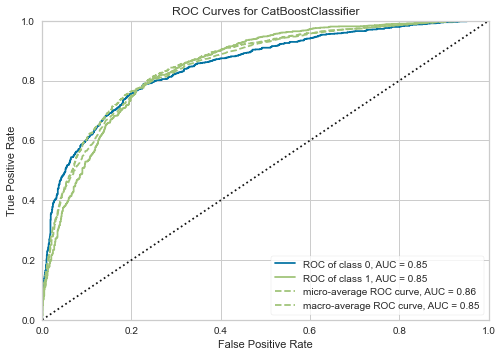

In [22]:
plot_model(tuned_catboost)

### Predict Model

In [23]:
predict_model(tuned_catboost)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.7793,0.8508,0.8300,0.7951,0.8122,0.5448,0.5456


,destination_Home,destination_No Urgent Place,destination_Work,passanger_Alone,passanger_Friend(s),passanger_Kid(s),passanger_Partner,weather_Rainy,weather_Snowy,weather_Sunny,...,Restaurant20To50_4~8,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never,toCoupon_GEQ15min_0,toCoupon_GEQ25min_1,direction_same_1,Y,Label,Score
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.9879
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0,0.5678
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1,0,0.5089
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,1,0.6356
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0,0.8369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2532,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1,0.7041
2533,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0,0,0.8701
2534,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8283
2535,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1,0.9454


### Final Model

In [24]:
final_catboost = finalize_model(tuned_catboost) # Final model 
final_catboost

### Predict Finl Model

In [25]:
predict_model(final_catboost)#final test model evaluation

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.9472,0.9903,0.9685,0.9414,0.9547,0.8914,0.8919


,destination_Home,destination_No Urgent Place,destination_Work,passanger_Alone,passanger_Friend(s),passanger_Kid(s),passanger_Partner,weather_Rainy,weather_Snowy,weather_Sunny,...,Restaurant20To50_4~8,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never,toCoupon_GEQ15min_0,toCoupon_GEQ25min_1,direction_same_1,Y,Label,Score
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.9810
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,0.6871
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1,1,0.6811
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0,0.7129
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0,0.9559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2532,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.6911
2533,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0,0,0.8798
2534,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8832
2535,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1,0.9517


### Plot Model Error

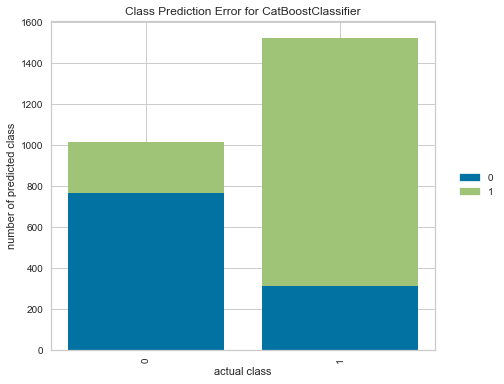

In [26]:
plot_model(tuned_catboost, plot = 'error')